# 21회 기출문제 풀이 (1) 

## 머신 러닝 (50점)
학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

1-1. 시각화 포함 탐색적 자료분석(EDA) <br>
1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.<br>
1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.<br>


In [46]:
import pandas as pd
import numpy as np 
df = pd.read_csv("C:/adp/data/student_data.csv")
df.tail()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12
394,MS,M,no,no,3.0,2.0,3.0,3.0,3.0,5.0,5.0,9,8,9


In [43]:
## 종속변수 분포 확인 
import matplotlib.pyplot as plt

df['grade'].value_counts()

9     50
11    40
12    39
10    36
13    34
15    31
8     29
14    28
7     19
6     17
4     15
5     12
16    12
17     9
18     9
2      7
19     4
3      3
1      1
Name: grade, dtype: int64

(array([ 8., 18., 29., 48., 50., 76., 73., 59., 21., 13.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <BarContainer object of 10 artists>)

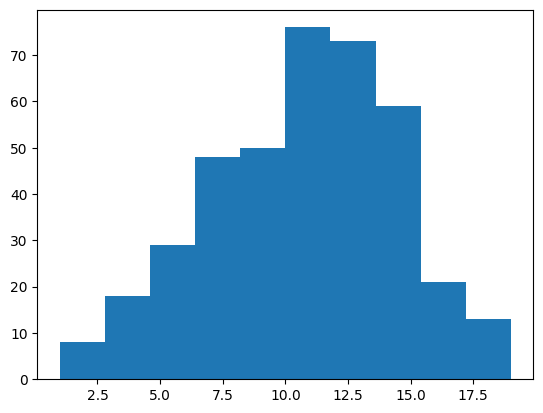

In [44]:
plt.hist('grade', data = df)

In [39]:
# 1. 결측치 존재 여부 : 결측치 변수 기술 및 결측치 처리 필요여부 기술
# 2. 데이터 타입 설명 : object변수 설명 및 인코딩 필요여부 설명
# 3. 종속변수 분포 설명 : 종속변수 분포 설명
# 4. 독립변수 상관관계 설명 : 상관관계 높은 변수 다중공산성 주의 필요
# 5. 종속변수와 독립변수의 상관관계 설명 : 설명력이 높은 변수 존재하여 분석 정확도가 낮지 않을것으로 기대함
# 6. 유의할 점 (pandas_profiling의 warrning 값 설명) 

In [57]:
## 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.
# 1) 단순 대치법 : 수치형 변수라면, 각 컬럼의 평균이나 중앙값을 사용하여 결측치를 보간할 수 있으며, 
#                  명목형, 범주형 변수라면 최빈값을 사용하여 대치할 수 있습니다.              
# 2) KNN을 이용한 결측치 대체 : 보간법 중 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 통해 결측치가 있는 변수 대체를 할 수 있습니다. 
# * 단, KNN을 이용할 때에는 거리 계산이 가능한 수치형 변수만 사용 가능 
# - 선택 후 장단점 기술하면 됨 (KNN 추천) 
from sklearn.impute import KNNImputer

knn_data = df[['goout', 'Dalc', 'Walc', 'health', 'absences', 'famrel', 'freetime']]
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(knn_data)
df_filled = pd.DataFrame(df_filled, columns=knn_data.columns)
df[knn_data.columns] = df_filled

In [58]:
## 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.
# 1) 이산형 변수 : school , sex ,paid,  activities 이 존재, 이산형 변수이므로 boolean 타입으로 변경하여 KNN을 이용한 결측치 처리와 머신러닝에서 변수사용가능하도록 변환하였다. 
# 2) 나머지 변수들은 수치 or 순위형 변수로 판단되므로 원핫인코딩을 하지 않았다. 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      395 non-null    float64
 5   freetime    395 non-null    float64
 6   goout       395 non-null    float64
 7   Dalc        395 non-null    float64
 8   Walc        395 non-null    float64
 9   health      395 non-null    float64
 10  absences    395 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [60]:
df02 = pd.get_dummies(df, columns = ['school', 'sex', 'paid', 'activities'])
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    int64  
 8   G1              395 non-null    int64  
 9   G2              395 non-null    int64  
 10  school_GP       395 non-null    uint8  
 11  school_MS       395 non-null    uint8  
 12  sex_F           395 non-null    uint8  
 13  sex_M           395 non-null    uint8  
 14  paid_no         395 non-null    uint8  
 15  paid_yes        395 non-null    uint8  
 16  activities_no   395 non-null    uint8  
 17  activities_yes  395 non-null    uin

In [61]:
df02 = df02.astype({'grade':'float64', 'G1':'float64', 'G2':'float64'})
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_GP       395 non-null    uint8  
 11  school_MS       395 non-null    uint8  
 12  sex_F           395 non-null    uint8  
 13  sex_M           395 non-null    uint8  
 14  paid_no         395 non-null    uint8  
 15  paid_yes        395 non-null    uint8  
 16  activities_no   395 non-null    uint8  
 17  activities_yes  395 non-null    uin

In [6]:
# 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.<br>
# 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.<br>
# 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명. <br>
# 현업에서 사용시 주의할 점 등에 대해 기술.

In [ ]:
## 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.
# 1) 랜덤 분할 
#  - train test데이터셋을 나누어서 학습된 데이터를 검증할 수 있음 
#  - 분할 시에 무작위로 사용자가 지정하여 비율로 분할 함 
#  - 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트 데이터를 나누어서 적용시키는 이유는 
#    모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다. 
# 2) 층화 추출 기법 
# - 종속변수의 클래스의 비율이 학습용 데이터와 테스트용 데이터에 비율이 같게 분할함 
# - 클래스의 편향을 막을 수 있음 
# - 종속변수가 범주형 변수인 분류분석에 사용 

# 해당 데이터는 종속변수가 연속형이므로, 회귀분석을 사용한다. 그러므로 층화추출기법을 사용한 분할이 아닌 랜덤 샘플링을 통한 분할을 사용하여, 7:3 비율로 분할하였다. 

In [62]:
X = df02.drop('grade', axis=1)
y = df02['grade']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2022)

In [63]:
## 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.

# * 회귀분석과 분류분석을 모두 할 수 있는 분석알고리즘이다. 
# * 모두 범주형 변수를 독립변수로 사용할 수 없어 변환을 해주어야 한다. 
# * 과대 적합 과소적합을 막기위한 매개변수의 설정이 필요하다.

# * 해당 데이터에서는 종속변수의 값이 연속형이므로 회귀분석이 적합하다. 

In [64]:
## 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명.
# 현업에서 사용시 주의할 점 등에 대해 기술.

In [65]:
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# SVR은 차원 개념으로 분석하므로 Scaler 필요

In [68]:
# SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'C': [0.1, 1,10,100],'gamma': [0.001, 0.01, 0.1, 1, 10]}
]

grid_svm = GridSearchCV(SVR(), param_grid =param_grid, cv = 5)
grid_svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
15,100.0,0.001,0.960980
11,10.0,0.010,0.954907
16,100.0,0.010,0.944057
10,10.0,0.001,0.941771
6,1.0,0.010,0.913949
12,10.0,0.100,0.819472
17,100.0,0.100,0.816031
7,1.0,0.100,0.717868
5,1.0,0.001,0.304088
1,0.1,0.010,0.220150


In [69]:
svr = SVR(C=100, gamma = 0.001) 
svr.fit(X_train_scaled, y_train)
print("R2 : ", svr.score(X_test_scaled, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,svr.predict(X_test_scaled))))

R2 :  0.9566210990442572
RMSE: 0.782506303828686


In [70]:
# RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000) 
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print("R2 : ", rf.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rf.predict(X_test))))

R2 :  0.956543720616339
RMSE: 0.7832039025318863


In [71]:
# XGBRegressor
xgb = XGBRegressor(n_estimators =1000, max_depth=11) 
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)
print("R2 : ", xgb.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))

R2 :  0.9620911309429069
RMSE: 0.7315078427592171


In [73]:
## 21회 기출분석 (3) 
## 2. 통계분석 (50점) <br>
# 2. 연속형 독립변수 여러개의 소규모 데이터. (총 29점 )변수명은 순서대로 x1~x10 , 의미는 없는 데이터 <br>
# 2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br> <br>
# 2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. <br>
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br> <br>
# 2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.<br>
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

In [1]:
import pandas as pd 
import numpy as np 
df01 = pd.read_csv("C:/adp/data/BostonHousing.csv")

# 훈련, 테스트 셋 분리 
X = df01.drop('MEDV', axis = 1)
y = df01['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size =0.2, random_state = 2022)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 11)
(102, 11)
(404,)
(102,)


In [2]:
df01.tail()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.573,6.030,80.8,2.5050,273,21.0,396.90,7.88,11.9


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

In [12]:
## 2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오
lr = LinearRegression() 
lr.fit(x_train,y_train)

## R2 
print("선형회귀 결정계수 : ", lr.score(x_test,y_test))
print("선형회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

선형회귀 결정계수 :  0.6005773464626034
선형회귀 RMSE :  5.343855151460941


In [13]:
## 2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. <br>
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

In [14]:
alpha = np.arange(0,1.1,0.1)
ridge = Ridge(normalize=True) 
param_grid = {'alpha':alpha}
ridge_model = GridSearchCV(ridge, param_grid)
ridge_model.fit(x_train,y_train)

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce th

GridSearchCV(estimator=Ridge(normalize=True),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [16]:
print(ridge_model.best_params_)
print("릿지회귀 결정계수 : ", ridge_model.score(x_test,y_test))
print("릿지회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, ridge_model.predict(x_test))))

{'alpha': 0.1}
릿지회귀 결정계수 :  0.6146859761330767
릿지회귀 RMSE :  5.248627353525253


In [17]:
## 2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.<br>
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>

In [19]:
lasso = Lasso(normalize=True) 
param_grid = {'alpha':alpha}
lasso_model = GridSearchCV(lasso, param_grid)
lasso_model.fit(x_train,y_train)
lasso_model.best_estimator_


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

Lasso(alpha=0.0, normalize=True)

In [20]:
print(lasso_model.best_params_)
print("라쏘회귀 결정계수 : ", lasso_model.best_estimator_.score(x_test,y_test))
print("라쏘회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, lasso_model.best_estimator_.predict(x_test))))
# lasso

{'alpha': 0.0}
라쏘회귀 결정계수 :  0.6005773464625985
라쏘회귀 RMSE :  5.343855151460974


In [ ]:
# 21회 기출분석 (4) 
# 2. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)<br>
# 다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요. <br>

# 3. ANOVA분석 (9점)<br>
# 변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)<br>
# 이원분산분석을 수행하고 통계표를 작성하시오.<br>

In [23]:
import pandas as pd
import numpy as np

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함

line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

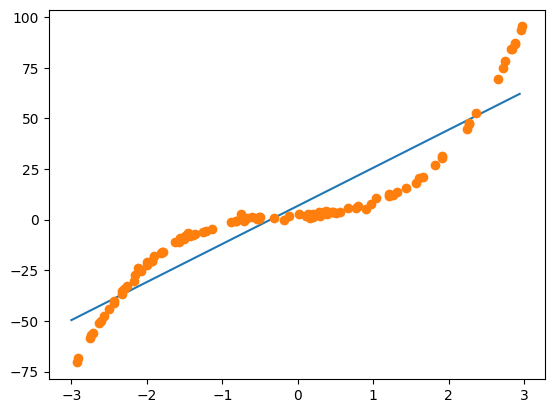

In [25]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line))
plt.plot(X[:,0], y, 'o')

In [26]:
from sklearn.preprocessing import PolynomialFeatures
## x**3 까지 3차항을 적용시켜야 함 
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

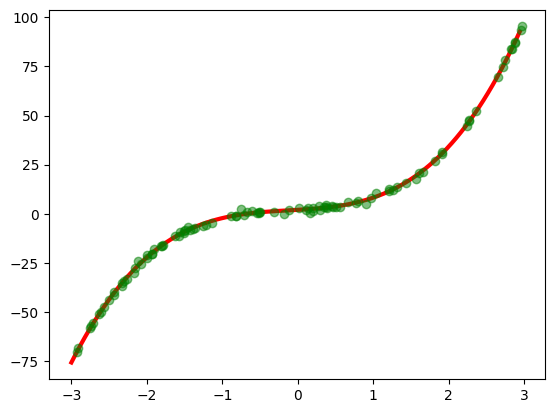

In [29]:
line_poly = poly.transform(line)
reg = LinearRegression().fit(X_poly, y)
plt.plot(line, reg.predict(line_poly), c='r',linewidth=3)
plt.plot(X,y,'o',c = 'g', alpha=0.5)

In [30]:
reg.coef_

array([[2.2499181 , 1.00825484, 2.9641895 ]])

In [ ]:
## 3. ANOVA분석 (9점)
# 변수 3개(하나는 수치형 변수/ 나머지 두 개는 범주형 변수)<br>
# 이원분산분석을 수행하고 통계표를 작성하시오.<br>

# 예제 : 생존과 요금, 나이에 대해 이원분산분석을 수행하라 

In [ ]:
# 분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법이다.

# 가. 상호작용효과 검정에 대한 가설
# 1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. <br>
# 2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. <br>

# 나. 주효과 검정에 대한 가설
# 1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
# 2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
# 3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
# 4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다.

In [31]:
avocado = pd.read_csv('C:/adp/data/avocado.csv')
avocado = avocado[["AveragePrice","type","region"]]
avocado = avocado[(avocado['region']=='Orlando') | (avocado['region']=='Boston' )| (avocado['region']=='Chicago')].reset_index(drop=True)
avocado


,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [32]:
## 독립변수 type,region 종속변수 AveragePrice 을 Series로 변경 
AveragePrice = avocado["AveragePrice"]
avocado_type = avocado["type"]
region = avocado["region"]

In [34]:
## 분산분석 수행 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~C(avocado_type)*C(region)' 
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ=2)

In [35]:
aov_table
# 교호작용 : 유의수준 0.05보다 작으므로 교호작용이 존재한다고 볼 수 있다.
# type : 유의수준 0.05보다 작으므로 교호작용이 존재한다고 볼 수 있다.
# region : 유의수준 0.05보다 작으므로 교호작용이 존재한다고 볼 수 있다.

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


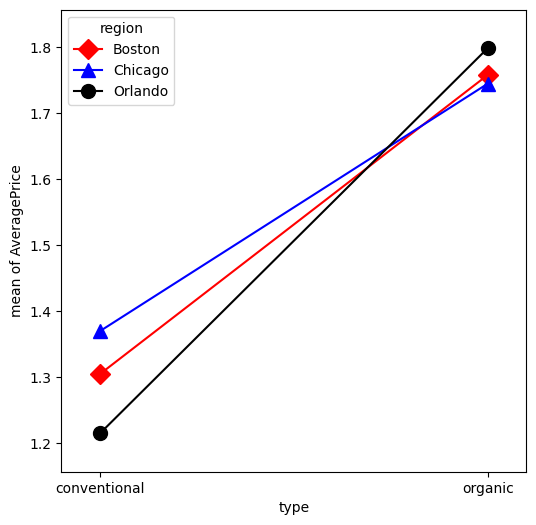

In [36]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(avocado_type, region , AveragePrice,colors=['red', 'blue', 'black'], markers=['D', '^','o'], ms=10, ax=ax)

In [48]:
import sklearn
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'datasets',
 'decomposition',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'neighbors',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'tree',
 'utils']

In [75]:
import pkg_resources 
import pandas 
OutputDataSet = pandas.DataFrame(sorted([(i.key, i.version) for i in pkg_resources.working_set])) 
pd.set_option('display.max_rows', 200)
OutputDataSet

,0,1
0,astropy,4.3.1
1,attrs,22.1.0
2,backcall,0.2.0
3,certifi,2022.9.24
4,charset-normalizer,2.1.1
5,colorama,0.4.6
6,confuse,2.0.0
7,cycler,0.11.0
8,cython,0.29.32
9,debugpy,1.6.3


In [72]:

print(OutputDataSet)


                      0          1
0               astropy      4.3.1
1                 attrs     22.1.0
2              backcall      0.2.0
3               certifi  2022.9.24
4    charset-normalizer      2.1.1
..                  ...        ...
96           xlsxwriter      1.2.0
97                 xlwt      1.3.0
98                 zict      1.0.0
99                 zipp      0.6.0
100      zope.interface      4.6.0

[101 rows x 2 columns]
